# Natural Language Processing with Disaster Tweets

The Natural Language Processing with Disaster Tweets project aims to analyze tweets related to disasters to determine whether they pertain to an actual disaster event or are merely general discussions. This project involves using natural language processing (NLP) techniques to process and interpret text data from tweets. The model examines phrases, sentiment, and linguistic patterns to classify the tweets. By distinguishing between relevant and irrelevant information in real-time, it aids emergency management and disaster response teams in accessing accurate and critical information promptly. The project’s outcomes help reduce misinformation during crises, contribute to effective response strategies, and demonstrate the potential of social media in crisis management.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cloud-picture/cloud.png
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
ss=pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
train=pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test=pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [3]:
ss.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
train.drop("location",axis=1,inplace=True)
test.drop("location",axis=1,inplace=True)
train.dropna(inplace=True)
print(train.shape)
train.isnull().sum()

(7552, 4)


id         0
keyword    0
text       0
target     0
dtype: int64

In [9]:
train.head()

,id,keyword,text,target
31,48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,Crying out for more! Set me ablaze,0
35,53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


In [10]:
test.isnull().sum()

id          0
keyword    26
text        0
dtype: int64

In [11]:
print(test.shape)
test.dropna(inplace=True)
print(test.shape)
test.isnull().sum()

(3263, 3)
(3237, 3)


id         0
keyword    0
text       0
dtype: int64

In [12]:
train["text"]=train["text"].str.lower()
test["text"]=test["text"].str.lower()
train["text"]=train["text"].str.replace('[^\w\s]','',regex=True)
test["text"]=test["text"].str.replace('[^\w\s]','',regex=True)

train["text"]=train["text"].str.replace('\d+','')
test["text"]=test["text"].str.replace('\d+','')

train["text"]=train["text"].str.replace('\n',' ')
test["text"]=test["text"].str.replace('\n',' ')

In [13]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'
train['language'] = train['text'].apply(detect_language)
test['language'] = test['text'].apply(detect_language)

In [ ]:
train=train[train["language"]=='en']
test=test[test["language"]=='en']
train.drop("language",axis=1,inplace=True)
test.drop("language",axis=1,inplace=True)
print(train.shape)
print(test.shape)

In [ ]:
#Importing necessary libraries
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Creating a function to generate wordcloud
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('/kaggle/input/cloud-picture/cloud.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

In [ ]:
#All tweets
wc(train.text,'blue')

In [ ]:
wc(train[train.target==1].text,'red')

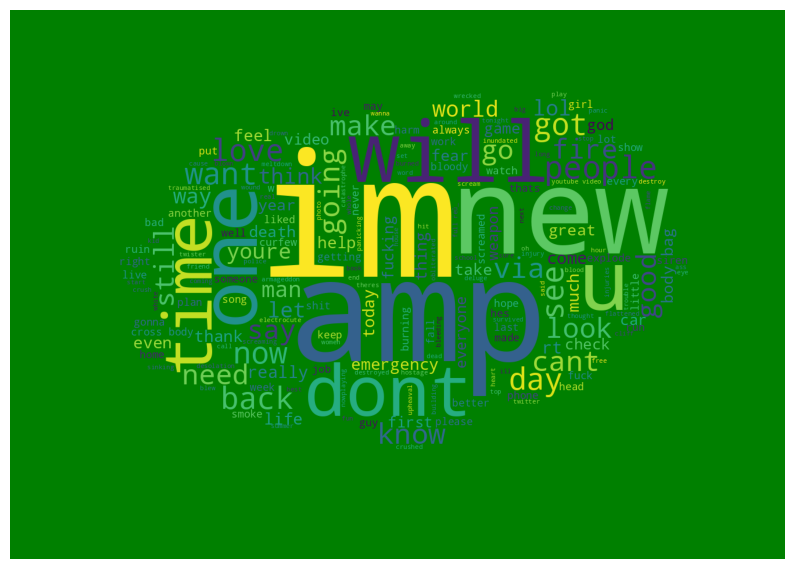

In [21]:
wc(train[train.target==0].text,'green')

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [23]:
vect=CountVectorizer(stop_words="english",ngram_range=(1,3),max_features=100000,analyzer=lemmafn)

In [24]:
x=train["text"]
x=vect.fit_transform(x)
y=train["target"]

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

2024-06-12 14:27:00.384373: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-12 14:27:00.384442: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-12 14:27:00.386194: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [27]:
model=Sequential()
model.add(Dense(1000,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(600,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(400,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(250,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [28]:
history=model.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))

Epoch 1/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 35s 174ms/step - accuracy: 0.6917 - loss: 0.5763 - val_accuracy: 0.8113 - val_loss: 0.4495
Epoch 2/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 31s 173ms/step - accuracy: 0.9209 - loss: 0.2148 - val_accuracy: 0.7879 - val_loss: 0.5194
Epoch 3/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 31s 172ms/step - accuracy: 0.9748 - loss: 0.0713 - val_accuracy: 0.7639 - val_loss: 0.6591
Epoch 4/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 32s 174ms/step - accuracy: 0.9835 - loss: 0.0440 - val_accuracy: 0.7673 - val_loss: 0.9447
Epoch 5/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 32s 174ms/step - accuracy: 0.9882 - loss: 0.0291 - val_accuracy: 0.7714 - val_loss: 1.0661
Epoch 6/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 32s 174ms/step - accuracy: 0.9892 - loss: 0.0214 - val_accuracy: 0.7673 - val_loss: 1.2873
Epoch 7/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 32s 174ms/step - accuracy: 0.9905 - loss: 0.0225 - val_accuracy: 0.7735 - val_loss: 1.2290
Epoch 8/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 32s 174ms/step - accuracy: 0.9914 - loss: 0

In [29]:
t_data=vect.transform(test["text"])
preds=model.predict(t_data)

98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [30]:
preds=ss["target"]
ss.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [31]:
model.save("model.h5")
ss.to_csv("submission.csv",index=False)